# Measures of Central Tendency & Dispersion

❖	Measures of Central Tendency [Mean, Median, Mode], and Location [Quartile, Decile, Percentile].

❖	Which Measure is the Best one in which situation?

❖	Measures of Dispersion [Range, Variance, Standard Deviation, Coefficient of Variation].

Descriptive statistics summarize and organize characteristics of a dataset.

**Measures of Central Tendency:**
Mean, Median, and Mode help identify the 'center' of the data.

- **Mean:** The arithmetic average, useful when there are no extreme outliers.

- **Median:** The middle value, preferred when data has outliers as it is resistant to extreme values.

- **Mode:** The most frequently occurring value, useful for categorical data.

**Measures of Location:** Quartiles, Deciles, and Percentiles help understand the spread of data.

- **Quartiles:** Q1 (25%), Q2 (Median - 50%), Q3 (75%).
- **Deciles:** Divide data into ten equal parts.
- **Percentiles:** Show the relative standing of a value in the dataset.

In [ ]:
# Loading the required Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("Amazon Sale Report.csv")

# Display basic info
display(df.head())
display(df.info())

<ipython-input-1-673e5e9f11c6>:10: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54651 entries, 0 to 54650
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               54651 non-null  int64  
 1   Order ID            54651 non-null  object 
 2   Date                54651 non-null  object 
 3   Status              54651 non-null  object 
 4   Fulfilment          54650 non-null  object 
 5   Sales Channel       54650 non-null  object 
 6   ship-service-level  54650 non-null  object 
 7   Style               54650 non-null  object 
 8   SKU                 54650 non-null  object 
 9   Category            54650 non-null  object 
 10  Size                54650 non-null  object 
 11  ASIN                54650 non-null  object 
 12  Courier Status      51638 non-null  object 
 13  Qty                 54650 non-null  float64
 14  currency            51334 non-null  object 
 15  Amount              51334 non-null  float64
 16  ship

None

In [ ]:
# Example: Analyzing a numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 0:
    sample_column = numeric_columns[0]  # Choose first numeric column

    # Measures of Central Tendency
    mean = df[sample_column].mean()
    median = df[sample_column].median()
    mode = df[sample_column].mode()[0]
    print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

    # Quartiles, Deciles, Percentiles
    q1 = df[sample_column].quantile(0.25)
    q3 = df[sample_column].quantile(0.75)
    deciles = df[sample_column].quantile([i/10 for i in range(1, 10)])
    percentiles = df[sample_column].quantile([0.10, 0.90])
    print(f"Q1: {q1}, Q3: {q3}")
    print(f"Deciles: {deciles.values}")
    print(f"Percentiles (10% & 90%): {percentiles.values}")

Mean: 8599.5, Median: 8599.5, Mode: 0
Q1: 4299.75, Q3: 12899.25
Deciles: [ 1719.9  3439.8  5159.7  6879.6  8599.5 10319.4 12039.3 13759.2 15479.1]
Percentiles (10% & 90%): [ 1719.9 15479.1]


In [ ]:
    # Measures of Central Tendency
    mean = df["Amount"].mean()
    median = df["Amount"].median()
    mode = df["Amount"].mode()[0]
    print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

    # Quartiles, Deciles, Percentiles
    q1 = df["Amount"].quantile(0.25)
    q3 = df["Amount"].quantile(0.75)
    deciles = df["Amount"].quantile([.10, .20, .30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90])
    percentiles = df["Amount"].quantile([0.10, 0.90])
    print(f"Q1: {q1}, Q3: {q3}")
    print(f"Deciles: {deciles.values}")
    print(f"Percentiles (10% & 90%): {percentiles.values}")

Mean: 631.4720477656134, Median: 579.0, Mode: 399.0
Q1: 435.0, Q3: 782.0
Deciles: [ 360.  399.  459.  517.  579.  654.  744.  807. 1033.]
Percentiles (10% & 90%): [ 360. 1033.]


In [ ]:
# Select only the 'Qty' and 'Amount' columns
qty_amount_df = df[['Qty', 'Amount']]

# Generate descriptive statistics for these columns
qty_amount_df.describe().round().T


,count,mean,std,min,25%,50%,75%,max
Qty,54650.0,1.0,0.0,0.0,1.0,1.0,1.0,15.0
Amount,51334.0,631.0,274.0,0.0,435.0,579.0,782.0,5584.0


In [ ]:
# prompt: Give me case with this data where Median is a better measure than mean due to the presence of outliers

# Create a sample dataset with an outlier
data = [10, 12, 15, 18, 20, 22, 25, 1000]  # 1000 is an outlier

# Calculate the mean
mean_data = np.mean(data)

# Calculate the median
median_data = np.median(data)

print(f"Mean: {mean_data}, Median: {median_data}")

# Explanation:
# In this case, the outlier (1000) significantly influences the mean, pulling it much higher than the typical values in the dataset.
# The median, on the other hand, is not affected by the outlier and represents the central value more accurately, making it a better measure of central tendency in the presence of extreme values.


Mean: 140.25, Median: 19.0


# Measures of Dispersion/Spread

Measures of Dispersion describe the spread of data.

- **Range:** The difference between max and min values.
- **Variance:** The average squared deviation from the mean.
- **Standard Deviation**: The square root of variance, shows how much values deviate from the mean.
- **Coefficient of Variation:** Ratio of standard deviation to mean, useful for comparing variability across datasets.

In [ ]:
# Compute Measures of Dispersion
range_val = df["Amount"].max() - df["Amount"].min()
variance = df["Amount"].var()
std_dev = df["Amount"].std()
coef_var = std_dev / mean
print(f"Range: {range_val}, Variance: {variance}, Standard Deviation: {std_dev}, Coefficient of Variation: {coef_var}")

Range: 5495.0, Variance: 73946.67972762829, Standard Deviation: 271.93138790442765, Coefficient of Variation: 0.03162176730093932


# Shape Characteristics

Measures of Shape describe the distribution of data.

- **Skewness:** Measures symmetry. Positive skew means a long right tail, negative skew means a long left tail.
- **Kurtosis:** Measures how heavy or light-tailed the distribution is compared to a normal distribution.

In [ ]:
# Compute Skewness and Kurtosis
skewness = stats.skew(df["Amount"].dropna())
kurtosis = stats.kurtosis(df["Amount"].dropna())

print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 1.0887312442703134, Kurtosis: 5.74381629988207


**Skewness:**

* **Definition:** Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean.
* **Positive Skew (Skewness > 0):**  A positive skew indicates that the tail on the right side of the distribution is longer or fatter than the left side. This means there are more extreme values on the higher end of the data.
* **Negative Skew (Skewness < 0):** A negative skew indicates that the tail on the left side of the distribution is longer or fatter than the right side. This means there are more extreme values on the lower end of the data.
* **Zero Skew (Skewness ≈ 0):** A skewness value close to zero suggests that the distribution is roughly symmetrical.


**Kurtosis:**

* **Definition:** Kurtosis measures the heaviness of the tail of the distribution. It tells us how concentrated the data is around the mean and how spread out the tails are.
* **Leptokurtic (Kurtosis > 0):** A positive kurtosis means the distribution has heavier tails and a sharper peak compared to a normal distribution. This indicates more extreme values and a more concentrated distribution around the mean.
* **Platykurtic (Kurtosis < 0):** A negative kurtosis means the distribution has lighter tails and a flatter peak compared to a normal distribution. This indicates fewer extreme values and a more spread-out distribution.
* **Mesokurtic (Kurtosis ≈ 0):** A kurtosis value close to zero suggests that the distribution has similar tail behavior and peak shape to a normal distribution.



**In the context of Our Code:**


The `skewness` and `kurtosis` values we are calculating for the "Amount" column in your Amazon dataset provide insights into the shape of its distribution:

* **If Skewness is positive:**  The "Amount" values tend to have a longer tail on the higher end, implying that some orders/sales are significantly larger than the average.
* **If Kurtosis is positive:** This means the "Amount" distribution has heavier tails than a normal distribution, indicating more outlier values in the data, possibly very high or very low sale amounts.


**In summary:**


By examining the skewness and kurtosis, you gain valuable information about how your "Amount" data is distributed. This can help you understand if there are any unusual patterns or outliers and how they might affect your analysis or modeling efforts.


**Important Notes:**


* **Context Matters:** The interpretation of skewness and kurtosis always depends on the specific context of your data.
* **Visualizations:** It's always helpful to plot histograms or box plots of your data to gain a visual understanding of its distribution and confirm what the skewness and kurtosis values are telling you.

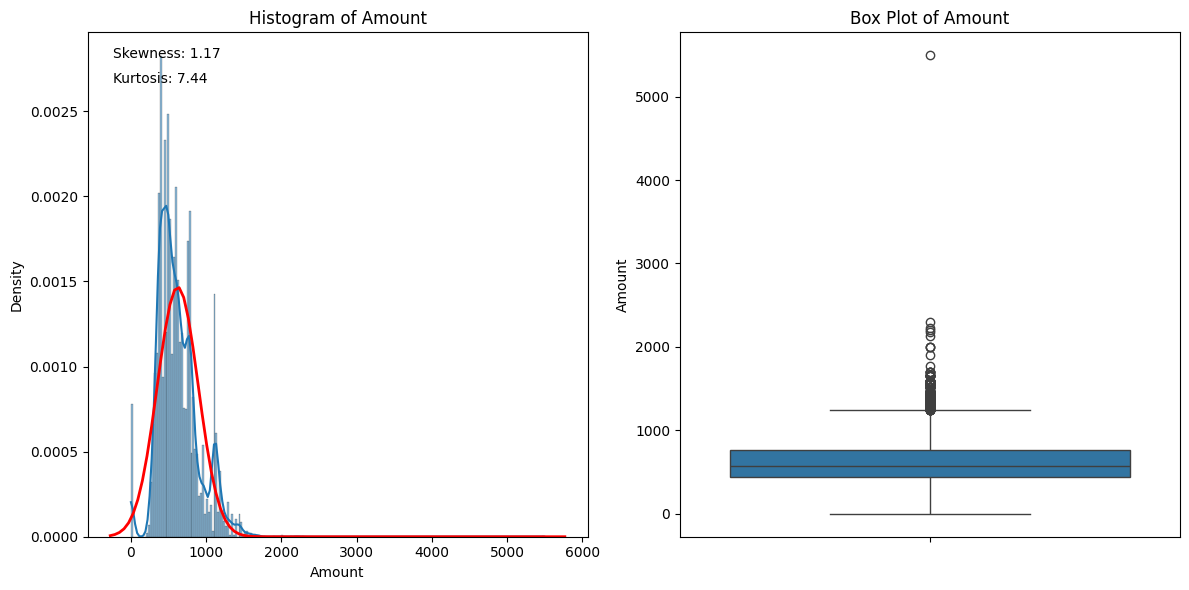

In [ ]:
# Histogram with normal probability, skewness, and kurtosis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], kde=True, stat='density')
plt.title('Histogram of Amount')

# Add normal probability line
# Filter out non-finite values before fitting
finite_data = df['Amount'][np.isfinite(df['Amount'])]
mu, std = stats.norm.fit(finite_data)  # Fit to finite data only
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

# Add skewness and kurtosis text
plt.text(0.05, 0.95, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.05, 0.90, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, fontsize=10)

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Amount'])
plt.title('Box Plot of Amount')

plt.tight_layout()
plt.show()

**In the context of linear regression, the target variable might require transformation if it shows significant skewness or kurtosis. This can help improve the model's performance by addressing issues like non-normality of the target variable.**


### Transformation Methods

If transformation of the target variable is deemed necessary, several methods can be applied to address skewness or kurtosis. Some of these methods include:

* **Logarithmic Transformation:** Taking the logarithm of the target variable can reduce right-skewness.
* **Square Root Transformation:** The square root transformation can also be used to reduce right-skewness.
* **Reciprocal Transformation:** Taking the reciprocal of the target variable can address left-skewness.
* **Box-Cox Transformation:** The Box-Cox transformation is a more general approach that can automatically find the optimal transformation based on the data. It can be especially helpful when the skewness is unknown or when the data is highly skewed.

### Impact of Transformation

Transforming the target variable can improve the performance of a linear regression model by:

* **Addressing Non-Normality:** It can help to normalize the distribution of the target variable, aligning it closer to a normal distribution.
* **Stabilizing Variance:** Some transformations can help to stabilize the variance of the target variable, which can be crucial for achieving accurate model estimations.